In [1]:
from PIL import Image
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os
import random
import scipy
import skimage.transform as sc

(620, 558)
620
558


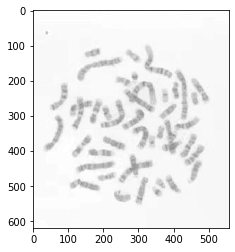

In [2]:
%matplotlib inline

image = Image.open('raw_chromosome.jpg','r')
plt.imshow(image)

image = image.convert('L')
img = np.array(image)


pic_size=img.shape
pic_height=pic_size[0]
pic_width=pic_size[1]

print(pic_size)
print(pic_height)
print(pic_width)

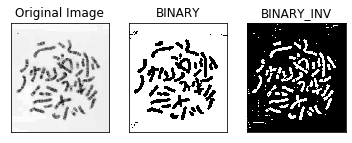

In [3]:
#img = cv2.imread('raw_chromosome.jpg',0)

thresh1 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,415,2)
thresh2 = cv2.adaptiveThreshold(img,127,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,55,2)

titles = ['Original Image','BINARY','BINARY_INV']
images = [img, thresh1, thresh2]


for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(images[i],'gray')    
    plt.title(titles[i])    
    plt.xticks([])
    plt.yticks([])

plt.show()


In [4]:
# 边界提取
# im2, contours, hierarchy = cv2.findContours(thresh1,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
contours, hierarchy= cv2.findContours(thresh1,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
# print(len(im2))
print(len(contours))
print(len(hierarchy))

135
1


In [5]:
# 图片提取
pred_dir = 'pics_black'
if not os.path.exists(pred_dir):
    os.mkdir(pred_dir)

img2=[0 for i in range(len(contours))]
print(len(contours))

img_array=image.load()


for i in range(len(contours)):
    b_image = Image.open('black_background.jpg','r').convert('L')
    b_img = np.array(b_image)
    b_img = sc.resize(b_img,(620,558),preserve_range=True)
    
    img2[i] = b_img #设置一张黑色背景图片
    cv2.drawContours(img2[i],contours[i],-1,(0,255,0),0)  #画边界 
    
    #全图片遍历找到相应的在轮廓之内的点
    for a in range(pic_height):
        for b in range(pic_width):
            #辨别是否在轮廓内是定义为1，不是定义为-1
            result = cv2.pointPolygonTest(contours[i], (a,b), False)
            if result > 0:
                img2[i][b,a] = img_array[a,b]
                
    
    #保存
    #scipy.misc.imsave('pic_'+str(i)+'.jpg',img2[i])
    plt.imsave(os.path.join(pred_dir, str(i + 1) + '.png'), img2[i], cmap = 'gray')

135
